# Module 6 & 7 - Associations

## Notes
- Install these packages:

    + `pip3 install mlxtend`
    + `pip3 install openpyxl`

- Training data set is from here: 
    
    + `https://archive.ics.uci.edu/ml/datasets/online+retail`  
    + `http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx`

- Code example is from here: 
    + `https://pbpython.com/market-basket-analysis.html`

In [212]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_excel('../data/Online_Retail.xlsx')
# df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
init_series = df.copy()
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Notes
Remove items that lack invoice number (Null/NaN) or have letter `C` as `credit transactions`.


In [213]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
print('initial length:', len(init_series))
print('    new length:', len(df))
print(' items removed:', len(init_series)-len(df))

initial length: 541909
    new length: 532621
 items removed: 9288


In [214]:
basket = (df[df['Country'] == "France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                          0.0                         0.0   
536852                          0.0                         0.0   
536974                          0.0                         0.0   
537065                          0.0                         0.0   
537463                          0.0                         0.0   
...                             ...                         ...   
580986                          0.0                         0.0   
581001                          0.0                         0.0   
581171                          0.0                         0.0   
581279                          0.0                         0.0   
581587                          0.0                         0.0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                             0.0                              0.0   
536852                             0.0                              0.0   
536974                             0.0                              0.0   
537065                             0.0                              0.0   
537463                             0.0                              0.0   
...                                ...                              ...   
580986                             0.0                              0.0   
581001                             0.0                              0.0   
581171                             0.0                              0.0   
581279                             0.0                              0.0   
581587                             0.0                              0.0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                 0.0   
536852                                 0.0   
536974                                 0.0   
537065                                 0.0   
537463                                 0.0   
...                                    ...   
580986                                 0.0   
581001                                 0.0   
581171                                 0.0   
581279                                 0.0   
581587                                 0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                       0.0                          0.0   
536852                                       0.0                          0.0   
536974                                       0.0                          0.0   
537065                                       0.0                          0.0   
537463                                       0.0                          0.0   
...                                          ...                          ...   
580986                                       0.0                          0.0   
581001                                       0.0                          0.0   
581171                                       0.0                          0.0   
581279                                       0.0                          0.0   
581587                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                             0.0                                 0.0   
536852                             0.0                                 0.0   
536974                             0.0                                 0.0   
537065                             0.0                                 0.0   
537463                         

In [215]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [217]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [218]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
1   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
2    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
3  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
4    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.096939            0.102041  0.073980    0.763158  7.478947   
1            0.102041            0.096939  0.073980    0.725000  7.478947   
2            0.094388            0.096939  0.079082    0.837838  8.642959   
3            0.096939            0.094388  0.079082    0.815789  8.642959   
4            0.094388            0.102041  0.073980    0.783784  7.681081   

   leverage  conviction  
0  0.064088    3.791383  
1  0.064088    3.283859  
2  0.069932    5.568878  
3  0.069932    4.916181  
4  0.064348    4.153061

In [219]:
len(rules)

26

In [222]:
new_rules = rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]
new_rules

antecedents  \
2                          (ALARM CLOCK BAKELIKE RED)   
3                        (ALARM CLOCK BAKELIKE GREEN)   
16                    (SET/6 RED SPOTTY PAPER PLATES)   
18                      (SET/6 RED SPOTTY PAPER CUPS)   
19                    (SET/6 RED SPOTTY PAPER PLATES)   
20  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...   
21  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
22  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                             consequents  antecedent support  \
2           (ALARM CLOCK BAKELIKE GREEN)            0.094388   
3             (ALARM CLOCK BAKELIKE RED)            0.096939   
16  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.127551   
18       (SET/6 RED SPOTTY PAPER PLATES)            0.137755   
19         (SET/6 RED SPOTTY PAPER CUPS)            0.127551   
20  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.122449   
21       (SET/6 RED SPOTTY PAPER PLATES)            0.102041   
22         (SET/6 RED SPOTTY PAPER CUPS)            0.102041   

    consequent support   support  confidence      lift  leverage  conviction  
2             0.096939  0.079082    0.837838  8.642959  0.069932    5.568878  
3             0.094388  0.079082    0.815789  8.642959  0.069932    4.916181  
16            0.132653  0.102041    0.800000  6.030769  0.085121    4.336735  
18            0.127551  0.122449    0.888889  6.968889  0.104878    7.852041  
19            0.137755  0.122449    0.960000  6.968889  0.104878   21.556122  
20            0.132653  0.099490    0.812500  6.125000  0.083247    4.625850  
21            0.127551  0.099490    0.975000  7.644000  0.086474   34.897959  
22            0.137755  0.099490    0.975000  7.077778  0.085433   34.489796

In [223]:
len(new_rules)

8

In [225]:
basket['ALARM CLOCK BAKELIKE GREEN'].sum()

340.0

In [226]:
basket['ALARM CLOCK BAKELIKE RED'].sum()


316.0

In [227]:
basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 4) &
        (rules2['confidence'] >= 0.5)]


antecedents                         consequents  \
1   (PLASTERS IN TIN CIRCUS PARADE)  (PLASTERS IN TIN WOODLAND ANIMALS)   
7        (PLASTERS IN TIN SPACEBOY)  (PLASTERS IN TIN WOODLAND ANIMALS)   
10    (RED RETROSPOT CHARLOTTE BAG)            (WOODLAND CHARLOTTE BAG)   

    antecedent support  consequent support   support  confidence      lift  \
1             0.115974            0.137856  0.067834    0.584906  4.242887   
7             0.107221            0.137856  0.061269    0.571429  4.145125   
10            0.070022            0.126915  0.059081    0.843750  6.648168   

    leverage  conviction  
1   0.051846    2.076984  
7   0.046488    2.011670  
10  0.050194    5.587746

# Example #2

`https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c`



In [228]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


In [229]:

df = pd.read_csv('../data/retail_dataset.csv')
dataset = df.to_numpy()
df = df.replace(np.nan, '', regex=True)
df

0       1       2       3       4       5       6
0     Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1     Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2    Cheese    Meat    Eggs    Milk    Wine                
3    Cheese    Meat    Eggs    Milk    Wine                
4      Meat  Pencil    Wine                                
..      ...     ...     ...     ...     ...     ...     ...
310   Bread    Eggs  Cheese                                
311    Meat    Milk  Pencil                                
312   Bread  Cheese    Eggs    Meat  Pencil  Diaper    Wine
313    Meat  Cheese                                        
314    Eggs    Wine   Bagel   Bread    Meat                

[315 rows x 7 columns]

In [230]:
from mlxtend.preprocessing import TransactionEncoder
dataset = df.to_numpy()


new_dataset = []
for row in dataset:
    new_row = []
    for i in row:
        if i != '':
            new_row.append(i)
    new_dataset.append(new_row)

te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df1 = pd.DataFrame(te_ary, columns=te.columns_)    
df1    

Bagel  Bread  Cheese  Diaper   Eggs   Meat   Milk  Pencil   Wine
0    False   True    True    True   True   True  False    True   True
1    False   True    True    True  False   True   True    True   True
2    False  False    True   False   True   True   True   False   True
3    False  False    True   False   True   True   True   False   True
4    False  False   False   False  False   True  False    True   True
..     ...    ...     ...     ...    ...    ...    ...     ...    ...
310  False   True    True   False   True  False  False   False  False
311  False  False   False   False  False   True   True    True  False
312  False   True    True    True   True   True  False    True   True
313  False  False    True   False  False   True  False   False  False
314   True   True   False   False   True   True  False   False   True

[315 rows x 9 columns]

In [231]:
from mlxtend.frequent_patterns import apriori


In [207]:
freq_items = apriori(df1, min_support=0.25, use_colnames=True, verbose=1)
freq_items

Processing 42 combinations | Sampling itemset size 3


support        itemsets
0   0.425397         (Bagel)
1   0.504762         (Bread)
2   0.501587        (Cheese)
3   0.406349        (Diaper)
4   0.438095          (Eggs)
5   0.476190          (Meat)
6   0.501587          (Milk)
7   0.361905        (Pencil)
8   0.438095          (Wine)
9   0.279365  (Bread, Bagel)
10  0.279365   (Milk, Bread)
11  0.298413  (Eggs, Cheese)
12  0.323810  (Meat, Cheese)
13  0.304762  (Cheese, Milk)
14  0.269841  (Cheese, Wine)
15  0.266667    (Meat, Eggs)
16  0.250794    (Meat, Wine)

In [232]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()
print(len(rules))

8


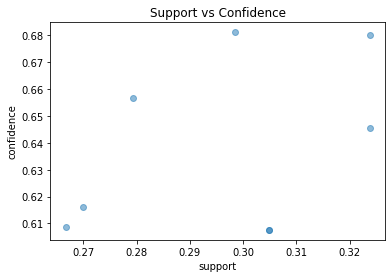

In [233]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

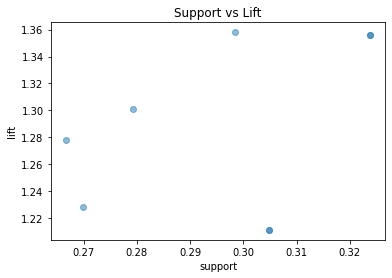

In [234]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

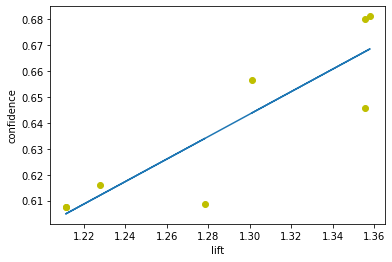

In [235]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
plt.xlabel('lift')
plt.ylabel('confidence')
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))